In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib.pyplot import suptitle
import matplotlib.style as style

from IPython.display import display, HTML
import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("/Users/pvaish10/Desktop/TADPOLE_D1_D2.csv")

In [3]:
df1 = df[['RID', 'PTID', 'VISCODE','D1', 'D2','DX','EXAMDATE','Years_bl','Month','AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG','AV45',
         'CDRSB','ADAS11','MMSE', 'RAVLT_immediate','Hippocampus', 'WholeBrain','Entorhinal', 'MidTemp','ABETA_UPENNBIOMK9_04_19_17',
         'TAU_UPENNBIOMK9_04_19_17','PTAU_UPENNBIOMK9_04_19_17']]

In [4]:
df1.head(1)

RID        PTID VISCODE  D1  D2  DX    EXAMDATE  Years_bl  Month   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  AV45  CDRSB  ADAS11  \
0    2  011_S_0002      bl   1   1  NL  2005-09-08       0.0      0  74.3     Male        16  Not Hisp/Latino    White  Married    0.0  1.36926   NaN    0.0   10.67   

   MMSE  RAVLT_immediate  Hippocampus  WholeBrain  Entorhinal  MidTemp ABETA_UPENNBIOMK9_04_19_17 TAU_UPENNBIOMK9_04_19_17 PTAU_UPENNBIOMK9_04_19_17  
0  28.0             44.0       8336.0   1229740.0      4177.0  27936.0

#### Select rows which have a DX value

In [5]:
df2 = df1.loc[df1['DX'].notnull()]

#### Make only three categories

In [6]:
df2 = df2.replace({'NL to MCI': 'MCI', 'MCI to Dementia': 'Dementia', 'MCI to NL' : 'NL', 'NL to Dementia': 'Dementia', 'Dementia to MCI': 'MCI'})

In [7]:
df2['DX'].value_counts()

MCI         4052
NL          2745
Dementia    2107
Name: DX, dtype: int64

#### Update the age as per the exam and diagnosis

In [8]:
df2['AGE_UPDATED'] = np.round(df2['AGE'] + df2['Years_bl'], 2)

In [9]:
df2.columns

Index(['RID', 'PTID', 'VISCODE', 'D1', 'D2', 'DX', 'EXAMDATE', 'Years_bl', 'Month', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED'],
      dtype='object')

#### How many examples are there

In [10]:
df2['D1'][df2['D1'] == 1].shape

(8841,)

In [11]:
df2['D1'][df2['D1'] == 0].shape

(63,)

In [12]:
df2['D2'][df2['D2'] == 1].shape

(5177,)

In [13]:
df2['D2'][df2['D2'] == 0].shape

(3727,)

In [14]:
df2.head(1)

RID        PTID VISCODE  D1  D2  DX    EXAMDATE  Years_bl  Month   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  AV45  CDRSB  ADAS11  \
0    2  011_S_0002      bl   1   1  NL  2005-09-08       0.0      0  74.3     Male        16  Not Hisp/Latino    White  Married    0.0  1.36926   NaN    0.0   10.67   

   MMSE  RAVLT_immediate  Hippocampus  WholeBrain  Entorhinal  MidTemp ABETA_UPENNBIOMK9_04_19_17 TAU_UPENNBIOMK9_04_19_17 PTAU_UPENNBIOMK9_04_19_17  AGE_UPDATED  
0  28.0             44.0       8336.0   1229740.0      4177.0  27936.0                                                                                       74.3

### Select the columns

In [15]:
df2.columns

Index(['RID', 'PTID', 'VISCODE', 'D1', 'D2', 'DX', 'EXAMDATE', 'Years_bl', 'Month', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED'],
      dtype='object')

In [16]:
df2['ABETA_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['ABETA_UPENNBIOMK9_04_19_17'], errors='coerce')
df2['TAU_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['TAU_UPENNBIOMK9_04_19_17'], errors='coerce')
df2['PTAU_UPENNBIOMK9_04_19_17'] = pd.to_numeric(df2['PTAU_UPENNBIOMK9_04_19_17'], errors='coerce')

In [17]:
df3 = df2[['D1', 'D2', 'DX',  'PTGENDER', 'PTEDUCAT', 'APOE4', 'FDG',
       'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED']]

In [18]:
df3 = df3.replace({'NL': 1 , 'MCI': 2, 'Dementia': 3})

In [19]:
categorial_cols = [
    'PTGENDER']

for cc in categorial_cols:
    dummies = pd.get_dummies(df3[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df3.drop(cc, axis=1, inplace=True)
    df3 = df3.join(dummies)

In [20]:
df3.columns

Index(['D1', 'D2', 'DX', 'PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male'],
      dtype='object')

In [21]:
predictors = ['D1', 'D2','PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male']


In [22]:
train_X = df3[predictors][df3['D1'] == 1]
train_X = train_X[['PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male']]
test_X = df3[predictors][df3['D2'] == 1]
test_X = test_X[['PTEDUCAT', 'APOE4', 'FDG', 'AV45', 'CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
       'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17', 'AGE_UPDATED', 'PTGENDER#Female', 'PTGENDER#Male']]


train_y = df3.DX[df3['D1'] == 1]
test_y = df3.DX[df3['D2'] == 1]

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [28]:
#!pip install xgboost

In [58]:
#Impute missing values after train test split
my_imputer = SimpleImputer()
train_X_imputed = pd.DataFrame(my_imputer.fit_transform(train_X.values))
test_X_imputed = pd.DataFrame(my_imputer.fit_transform(test_X.values))


https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [59]:
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
train_X_imputed, train_y = smt.fit_sample(train_X_imputed, train_y)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled=scaler.fit_transform(train_X_imputed)
test_X_scaled=scaler.fit_transform(test_X_imputed)

In [61]:
from sklearn.metrics import roc_auc_score
def multiclass_roc_dict(y_test,y_pred):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(y_test.values)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in y_test]
        new_pred_class = [0 if x in other_class else 1 for x in y_pred]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = 'macro')
        roc_auc_dict[per_class] = roc_auc
    return roc_auc_dict

In [62]:
# Decision Tree
def get_multiclass_roc_dict(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = OneVsRestClassifier(DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0))
    model.fit(train_X, train_y)
    preds_y = model.predict(test_X)
    multiclass_roc = multiclass_roc_dict(test_y, preds_y)
    return(multiclass_roc)

In [63]:
print("Decision Tree results with different number of leaf nodes:")
for max_leaf_nodes in [5, 50, 500, 5000,50000]:
    my_multiclass_roc_dict = get_multiclass_roc_dict(max_leaf_nodes, train_X_scaled, test_X_scaled, train_y, test_y)
    print("Max leaf nodes: %d" %(max_leaf_nodes))
    print(my_multiclass_roc_dict)

Decision Tree results with different number of leaf nodes:
Max leaf nodes: 5
{1: 0.5, 2: 0.4416444802457131, 3: 0.8934442838470528}
Max leaf nodes: 50
{1: 0.619100315547039, 2: 0.43181114153022915, 3: 0.8303124502935706}
Max leaf nodes: 500
{1: 0.6270870450635065, 2: 0.4182271165905391, 3: 0.8122068617348668}
Max leaf nodes: 5000
{1: 0.6395029285220069, 2: 0.40789211658455893, 3: 0.7648462299186025}
Max leaf nodes: 50000
{1: 0.6395029285220069, 2: 0.40789211658455893, 3: 0.7648462299186025}


In [64]:
# Random Forest
forest_model = OneVsRestClassifier(RandomForestClassifier(random_state=99))
forest_model.fit(train_X_scaled, train_y)
preds_y = forest_model.predict(test_X_scaled)
print("Random Forest Results")
print(multiclass_roc_dict(test_y, preds_y))

Random Forest Results
{1: 0.6276542602588614, 2: 0.5157100491928568, 3: 0.878660467914716}


In [65]:
# XGBoost
my_pipeline = make_pipeline(SimpleImputer(),OneVsRestClassifier(XGBClassifier()))
my_pipeline.fit(train_X_scaled, train_y)
preds_y = my_pipeline.predict(test_X_scaled)
print("XGBoost Results")
print(multiclass_roc_dict(test_y, preds_y))

XGBoost Results
{1: 0.6201996211192528, 2: 0.5423566284773178, 3: 0.9018423363923679}


In [66]:
# XGBoost with parameters tuning 
xgb_model = OneVsRestClassifier(XGBClassifier(n_estimators=1000))
xgb_model.fit(train_X_scaled, train_y)
preds_y = xgb_model.predict(test_X_scaled)
print("XGBoost Results with Parameter Tuning")
print(multiclass_roc_dict(test_y, preds_y))

XGBoost Results with Parameter Tuning
{1: 0.7533858455860019, 2: 0.5106320648202302, 3: 0.8463376302740683}


In [67]:
from sklearn.metrics import classification_report
# XGBoost with parameters tuning 
xgb_model = OneVsRestClassifier(XGBClassifier(n_estimators=100))
xgb_model.fit(train_X_scaled, train_y)
preds_y = xgb_model.predict(test_X_scaled)
print("Classification Report : {}".format(classification_report(test_y, preds_y, labels=[1, 2, 3])))

Classification Report :               precision    recall  f1-score   support

           1       0.91      0.26      0.40      2059
           2       0.51      0.65      0.58      2481
           3       0.43      0.98      0.60       637

   micro avg       0.54      0.54      0.54      5177
   macro avg       0.62      0.63      0.53      5177
weighted avg       0.66      0.54      0.51      5177



Confusion matrix, without normalization
[[ 528 1522    9]
 [  50 1620  811]
 [   0   10  627]]
Normalized confusion matrix
[[0.26 0.74 0.  ]
 [0.02 0.65 0.33]
 [0.   0.02 0.98]]


<Figure size 432x288 with 0 Axes>

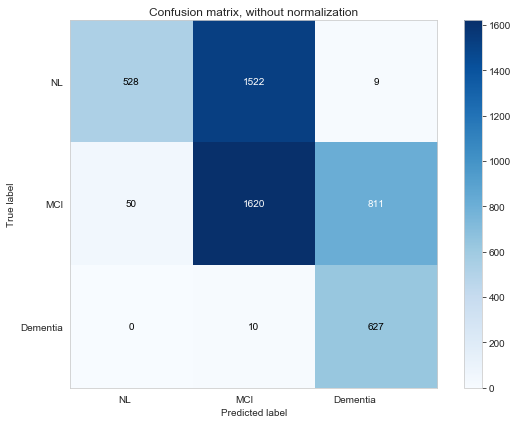

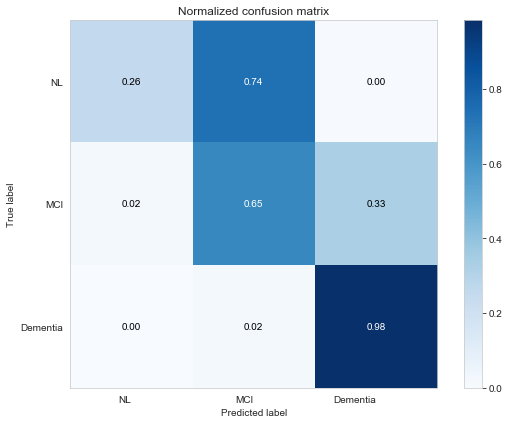

In [68]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid")
sns.despine()


def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(df3['DX'])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (8,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['NL','MCI','Dementia'], yticklabels=['NL','MCI','Dementia'],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Turns off grid on the left Axis.
    ax.grid(False)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(test_y, preds_y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_y, preds_y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<Figure size 432x288 with 0 Axes>

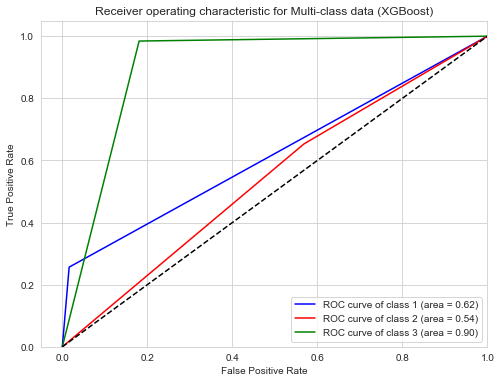

In [69]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

sns.set_style("whitegrid")
sns.despine()
fig,ax = plt.subplots(figsize = (8,6))

# Binarize the output
y_bin = label_binarize(test_y, classes=[ 1, 2,3])
n_classes = y_bin.shape[1]

y_score = label_binarize(preds_y, classes=[1, 2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i] ))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Multi-class data (XGBoost)')
plt.legend(loc="lower right")
plt.show()

### Code:
    https://www.kaggle.com/akshita72/alzheimers-prediction

In [70]:
#!pip install shap

### https://github.com/slundberg/shap

In [71]:
import shap
import xgboost

# load JS visualization code to notebook
shap.initjs()

model = xgboost.train({"learning_rate": 0.01, "n_estimators": 100, "eval_set":[(test_X_scaled, test_y)] }, xgboost.DMatrix(train_X_scaled, train_y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train_X.iloc[0,:])

In [72]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, train_X)

Could not find feature named: PTEDUCAT


ValueError: m has more than 2 dimensions

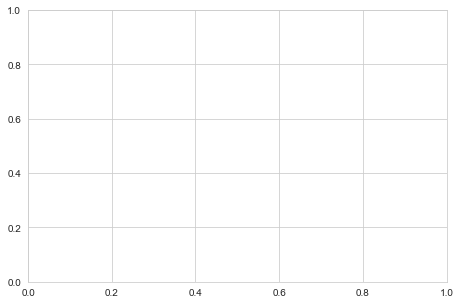

In [74]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("PTEDUCAT", shap_values, train_X)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("AGE_UPDATED", shap_values, train_X)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, train_X)

In [ ]:
shap.summary_plot(shap_values, train_X, plot_type="bar")

#### Reduce Features

In [ ]:
train_X = df3[predictors][df3['D1'] == 1]
train_X = train_X[['CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'WholeBrain',  'AGE_UPDATED']]
test_X = df3[predictors][df3['D2'] == 1]
test_X = test_X[['CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'WholeBrain',  'AGE_UPDATED']]


train_y = df3.DX[df3['D1'] == 1]
test_y = df3.DX[df3['D2'] == 1]

In [ ]:
#Impute missing values after train test split
my_imputer = SimpleImputer()
train_X_imputed = pd.DataFrame(my_imputer.fit_transform(train_X.values))
test_X_imputed = pd.DataFrame(my_imputer.fit_transform(test_X.values))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X_imputed)
test_X_scaled = scaler.fit_transform(test_X_imputed)

In [ ]:
# XGBoost with parameters tuning 
xgb_model = OneVsRestClassifier(XGBClassifier(n_estimators=100))
xgb_model.fit(train_X_scaled, train_y) 
preds_y = xgb_model.predict(test_X_scaled)
print("XGBoost Results with Parameter Tuning")
print(multiclass_roc_dict(test_y, preds_y))

In [ ]:
import shap
import xgboost

# load JS visualization code to notebook
shap.initjs()

model = xgboost.train({"learning_rate": 0.01, "n_estimators": 100, "eval_set":[(test_X_scaled, test_y)] }, xgboost.DMatrix(train_X_scaled, train_y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train_X.iloc[0,:],matplotlib=True)

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, train_X)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("WholeBrain", shap_values, train_X)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("ADAS11", shap_values, train_X)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, train_X)

In [ ]:
shap.summary_plot(shap_values, train_X, plot_type="bar")

In [ ]:
import pickle
# save the model to disk
filename = 'xgboost_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)